In [43]:
dpfile = "results_dp.txt"

res = [x.strip().split('\t') for x in open(dpfile).readlines()]

import numpy as np

In [44]:
gpu = {}
res_gpu = res[1:-2]
for i in range(len(res_gpu)):
    if i%2 == 0:
        k = res_gpu[i][0].split(' = ')[1]
        gpu[int(k)] = float(res_gpu[i+1][1])

In [45]:
import matplotlib.pyplot as plt

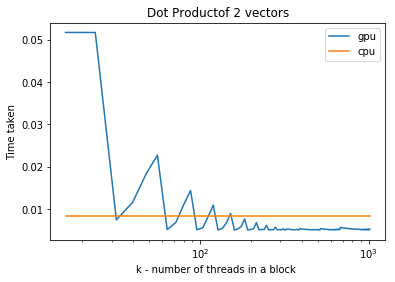

In [46]:

plt.title("Dot Productof 2 vectors")
plt.xlabel("k - number of threads in a block ")
plt.ylabel("Time taken")
plt.semilogx(gpu.keys(), gpu.values(), label="gpu")
plt.semilogx(gpu.keys(), len(gpu.keys())*[float(res[-2][1])], label="cpu")
plt.legend()

plt.savefig("dotprod")
plt.show()


cpu time mono 	1.4604e-05
gpu time 	1.7801e-05
cpu time para 	0.000816561
gpu mem copy time 	1.6545e-05
Max error: 0.000000


In [47]:
r = open("results_dp_varied.txt").readlines()
r = [x.strip("\n") for x in r]
graph = {}
currentk = None

for i in range(len(r)):
    if r[i][0] == "k":
        currentk = int(r[i].split(' = ')[-1])
        
        graph[currentk] = {"keys": [], "cpu_mono": [], "gpu": [], "cpu_para": [], "mem_copy": []}

    elif currentk is not None:
        t = [float(x) for x in r[i].split(" ")]
        if t[0] > 10**4:
            graph[currentk]["keys"].append(t[0])
            graph[currentk]["cpu_mono"].append(t[1])
            graph[currentk]["gpu"].append(t[2])
            graph[currentk]["cpu_para"].append(t[3])
            graph[currentk]["mem_copy"].append(t[4])

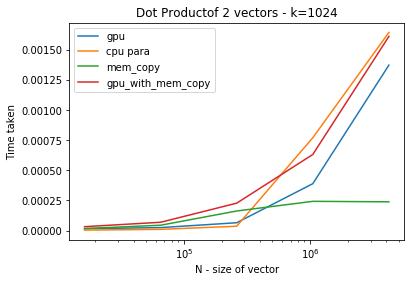

In [48]:
plt.title("Dot Productof 2 vectors - k=1024")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[1024]["keys"], graph[1024]["gpu"], label="gpu")
plt.semilogx(graph[1024]["keys"], graph[1024]["cpu_para"], label="cpu para")
plt.semilogx(graph[1024]["keys"], graph[1024]["mem_copy"], label="mem_copy")
plt.semilogx(graph[1024]["keys"], np.array(graph[1024]["mem_copy"]) + np.array(graph[1024]["gpu"]), label="gpu_with_mem_copy")
plt.legend()

plt.savefig("dotprod_varied_1024")
plt.show()


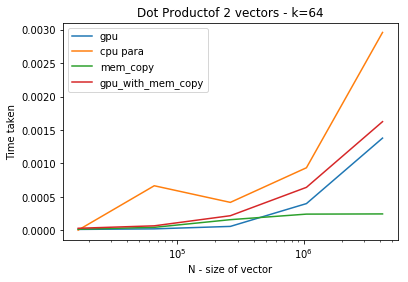

In [49]:
plt.title("Dot Productof 2 vectors - k=64")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[64]["keys"], graph[64]["gpu"], label="gpu")
plt.semilogx(graph[64]["keys"], graph[64]["cpu_para"], label="cpu para")
plt.semilogx(graph[64]["keys"], graph[64]["mem_copy"], label="mem_copy")
plt.semilogx(graph[64]["keys"], np.array(graph[64]["mem_copy"]) + np.array(graph[64]["gpu"]), label="gpu_with_mem_copy")

plt.legend()

plt.savefig("dotprod_varied_64")
plt.show()


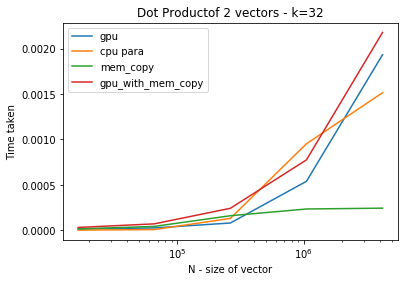

In [50]:
plt.title("Dot Productof 2 vectors - k=32")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[32]["keys"], graph[32]["gpu"], label="gpu")
plt.semilogx(graph[32]["keys"], graph[32]["cpu_para"], label="cpu para")
plt.semilogx(graph[32]["keys"], graph[32]["mem_copy"], label="mem_copy")
plt.semilogx(graph[1024]["keys"], np.array(graph[32]["mem_copy"]) + np.array(graph[32]["gpu"]), label="gpu_with_mem_copy")
plt.legend()

plt.savefig("dotprod_varied_32")
plt.show()


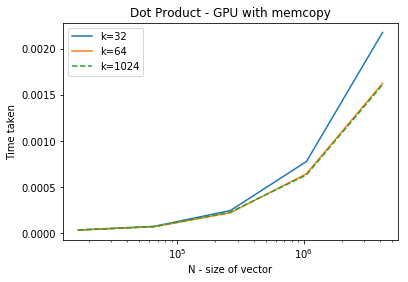

In [51]:
plt.title("Dot Product - GPU with memcopy")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")

plt.semilogx(graph[32]["keys"], np.array(graph[32]["mem_copy"]) + np.array(graph[32]["gpu"]), label="k=32")
plt.semilogx(graph[64]["keys"], np.array(graph[64]["mem_copy"]) + np.array(graph[64]["gpu"]), label="k=64")
plt.semilogx(graph[1024]["keys"], np.array(graph[1024]["mem_copy"]) + np.array(graph[1024]["gpu"]), '--',label="k=1024")
plt.legend()

plt.savefig("dotprod_varied_gpu")
plt.show()

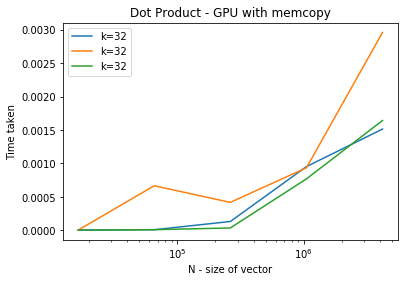

In [83]:
plt.title("Dot Product - GPU with memcopy")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")

plt.semilogx(graph[32]["keys"], graph[32]["cpu_para"], label="k=32")
plt.semilogx(graph[64]["keys"], graph[64]["cpu_para"], label="k=32")
plt.semilogx(graph[1024]["keys"], graph[1024]["cpu_para"], label="k=32")
plt.legend()

plt.savefig("dotprod_varied_cpu")
plt.show()

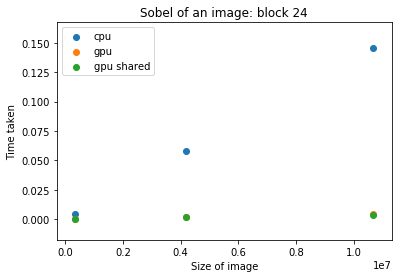

In [84]:
#Sobel

block_dim = [12, 24, 48, 96]
drone = [0.00465116, 9.59265e-05,  0.00011062]
drone_huge = [0.145083, 0.00405407, 0.00355989]
carre = [0.0577216, 0.00154007, 0.00147957]

cpu = [0.00465116, 0.145083, 0.0577216]
gpu = [9.59265e-05, 0.00405407, 0.00154007]
gpu_shared = [0.00011062, 0.00355989, 0.00147957]

sizes = [720*480, 4000*2667, 2048*2048 ]

plt.title("Sobel of an image: block 24")
plt.xlabel("Size of image")
plt.ylabel("Time taken")

plt.scatter(sizes, cpu, label="cpu")
plt.scatter(sizes, gpu, label = "gpu")
plt.scatter(sizes, gpu_shared, label  = "gpu shared")
plt.legend()
plt.savefig("sobel_all")
plt.show()

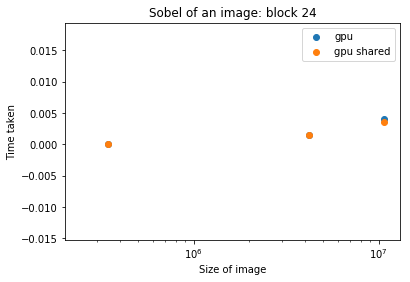

In [85]:
plt.title("Sobel of an image: block 24")

plt.scatter(sizes, gpu, label = "gpu")
plt.scatter(sizes, gpu_shared, label = "gpu shared")
plt.xscale("log")
plt.xlabel("Size of image")
plt.ylabel("Time taken")
plt.legend()
plt.savefig("sobel_gpu")
plt.show()

In [86]:
# drone huge, compare block differences for gpu and gpu shared

res = """0.144395 0.00613768 0.00392608 0.000106806
0.143492 0.00341635 0.00319514 0.000106817
0.143857 0.00339072 0.00877929 0.000105585
0.143831 1.78706e-06 1.54784e-06 0.000105874
0.144693 1.79628e-06 1.58292e-06 0.000106976"""

res = [x.strip().split(" ") for x in res.split("\n")]
res

[['0.144395', '0.00613768', '0.00392608', '0.000106806'],
 ['0.143492', '0.00341635', '0.00319514', '0.000106817'],
 ['0.143857', '0.00339072', '0.00877929', '0.000105585'],
 ['0.143831', '1.78706e-06', '1.54784e-06', '0.000105874'],
 ['0.144693', '1.79628e-06', '1.58292e-06', '0.000106976']]

In [87]:
blocks = [ 8 ,16 ,32 ,48 ,64 ]

In [88]:
cpu = []
gpu = []
gpu_shared = []
gpu_mem_copy = []
for r in res:
    cpu.append(float(r[0]))
    gpu.append(float(r[1]))
    gpu_shared.append(float(r[2]))
    gpu_mem_copy.append(float(r[1]) + float(r[3]))


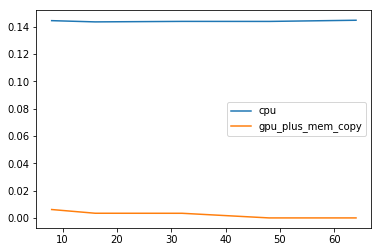

In [89]:
plt.plot(blocks, cpu, label="cpu")
plt.plot(blocks, gpu_mem_copy, label="gpu_plus_mem_copy")
plt.legend()
plt.savefig('sobel_cpu_gpu')
plt.show()

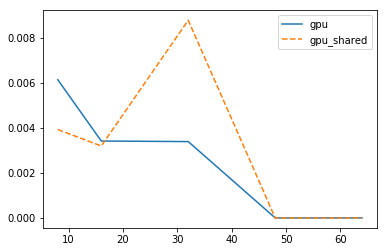

In [90]:
plt.plot(blocks, gpu, label="gpu")
plt.plot(blocks, gpu_shared, '--' ,label="gpu_shared")
plt.legend()
plt.show()

In [91]:
#Transpose 
results = """10 0.0321086 0.00198982 0.001949 4.25733e-05
12 0.0320848 0.00270494 0.00265243 4.36237e-05
14 0.0326644 0.00274077 0.00276101 4.28877e-05
16 0.0337767 0.00270762 0.00267699 4.33242e-05
18 0.0327346 0.00275528 0.00271659 4.34881e-05
20 0.0319898 0.00277131 0.00261932 4.30109e-05
22 0.0329048 0.00273254 0.0027967 4.31849e-05
24 0.0337871 0.00274549 0.00299727 4.30109e-05
26 0.0340991 0.00287113 0.00310305 4.27405e-05
28 0.0324813 0.00275629 0.00314364 4.26449e-05
30 0.032787 0.00274352 0.00307415 4.26855e-05
32 0.0321594 0.00268383 0.00304399 4.25655e-05"""

res = [x.strip().split(" ") for x in results.split("\n")]


no_blocks = []
cpu = []
gpu = []
gpu_shared = []
gpu_mem_copy = []
for r in res:
    no_blocks.append(int(r[0]))
    cpu.append(float(r[1]))
    gpu.append(float(r[2]))
    gpu_shared.append(float(r[3]))
    gpu_mem_copy.append(float(r[2]) + float(r[4]))
    

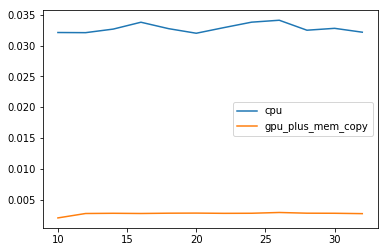

In [92]:
plt.plot(no_blocks, cpu, label="cpu")
plt.plot(no_blocks, gpu_mem_copy, label="gpu_plus_mem_copy")
plt.legend()
plt.savefig("transpose_cpu_gpu")
plt.show()


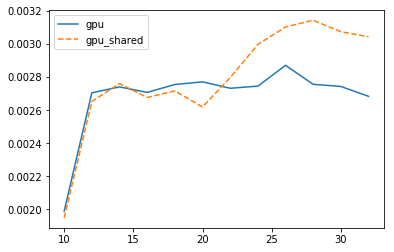

In [93]:
plt.plot(no_blocks, gpu, label="gpu")
plt.plot(no_blocks, gpu_shared, '--' ,label="gpu_shared")
plt.legend()
plt.savefig("transpose_gpu_gpu_shared")
plt.show()


In [94]:
results = """0.0322553 0.00199049 0.00206494 4.34425e-05
0.0326885 0.0027378 0.00277891 4.34214e-05
0.0320151 0.00270835 0.00264385 4.27374e-05
0.0326286 0.00270778 0.00274004 4.2676e-05
0.0328294 0.00275351 0.00272725 4.28697e-05
0.0321702 0.00280923 0.00275839 4.28391e-05
0.0320603 0.00269969 0.00263856 4.25041e-05
0.0329213 0.00274797 0.00305276 4.37395e-05
0.032124 0.00283607 0.00307561 4.26477e-05
0.0325867 0.00276028 0.00312227 4.43061e-05
0.0322831 0.00274176 0.00309715 4.2645e-05
0.0323552 0.00271762 0.00304777 4.278e-05"""


res = [x.strip().split(" ") for x in results.split("\n")]

cpu1 = []
gpu1 = []
gpu_shared1 = []
gpu_mem_copy1 = []
for r in res:
    cpu1.append(float(r[0]))
    gpu1.append(float(r[1]))
    gpu_shared1.append(float(r[2]))
    gpu_mem_copy1.append(float(r[1]) + float(r[3]))

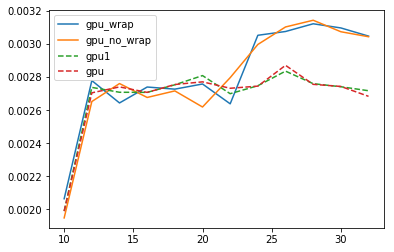

In [95]:
plt.plot(no_blocks, gpu_shared1, label="gpu_wrap")
plt.plot(no_blocks, gpu_shared, label="gpu_no_wrap")
plt.plot(no_blocks, gpu1, '--',label="gpu1")
plt.plot(no_blocks, gpu, '--',label="gpu")

plt.legend()
plt.savefig("transpose_gpu_wrap")
plt.show()


In [96]:
# HISTOGRAMME

In [108]:
#cpu_duration << " "  << gpu_duration << " "  << gpu_duration_shared << " " << gpu_mem_copy_duration

"""
4000 2667
0.0259447 0.0129359 0.0985123 0.000173771

2048 2048
0.0105453 0.00935989 0.170632 6.39349e-05

720 480
0.00119625 0.000300423 0.00122867 6.3992e-06


with int not unsigned long long for local 

720 480
0.000826324 0.000294553 0.000157424 5.3181e-05

2048 2048
0.010763 0.00992782 0.00236542 0.00057034

4000 2667
0.0259774 0.0131518 0.00494401 0.000318204
"""

long = [0.0259447, 0.0129359+0.000173771, 0.0985123+0.000173771 ]
inte = [0.0259774, 0.0131518+0.000318204, 0.00494401+0.000318204 ]

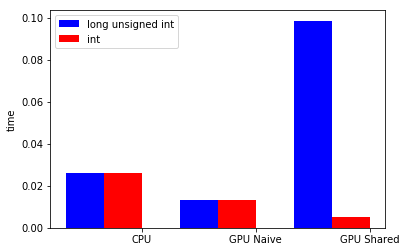

In [127]:
indices = [1,2,3]
width = np.min(np.diff(indices))/3

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(indices + width / 2)
ax.set_xticklabels( ('CPU', 'GPU Naive', 'GPU Shared') )

ax.bar(indices-width,long,width,color='b',label='long unsigned int')
ax.bar(indices,inte,width,color='r',label='int')
ax.set_ylabel('time')
plt.legend()
plt.savefig("histogramme")
plt.show()


In [128]:
results = """10 0.0103253 0.00842052 0.0106188 1.10947e-05
12 0.010956 0.00950649 0.00748307 1.14272e-05
14 0.0103644 0.00840125 0.00492968 1.11091e-05
16 0.010671 0.00903842 0.00416516 1.1477e-05
18 0.0103215 0.00839766 0.00324782 1.45629e-05"""

res = [x.strip().split(" ") for x in results.split("\n")]
no_blocks = [10, 12, 14, 16, 18]
cpu2 = []
gpu2 = []
gpu_shared2 = []
for r in res:
    cpu2.append(float(r[1]))
    gpu2.append(float(r[2])+float(r[4]))
    gpu_shared2.append(float(r[3])+float(r[4]))


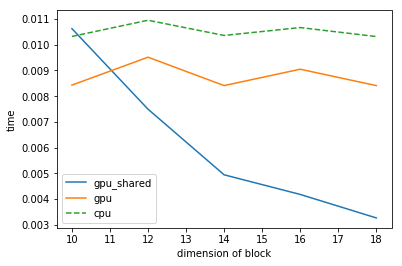

In [132]:
plt.plot(no_blocks, gpu_shared2, label="gpu_shared")
plt.plot(no_blocks, gpu2, label="gpu")
plt.plot(no_blocks, cpu2, '--',label="cpu")
plt.ylabel('time')
plt.xlabel('dimension of block')

plt.legend()
plt.savefig("histo")
plt.show()